In [1]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Confidence Interval

Provides a range that is likely to contain the unknown value and a confidence that the unknown value lays within that range. For example we can say that for some dataset of salary, after some tests, we found out that the confidence interval of guaranteed salary lays within $[3400, 3900]$ with $81\%$ level of confidence. That means that $19\%$ lays beyond the given range.

# Empirical Rule

If the data are normally distributed, we assume that:

* the confidence interval equals $[Mean(X) - Std(X), Mean(X) + Std(X)]$ with $68\%$ level of confidence,

* the confidence interval equals $[Mean(X) - 1.96 \times Std(X), Mean(X) + 1.96 \times Std(X)]$ with $95\%$ level of confidence,

* the confidence interval equals $[Mean(X) - 3 \times Std(X), Mean(X) + 3 \times Std(X)]$ with $99.7\%$ level of confidence.

In [2]:
mean = 0
std = 1

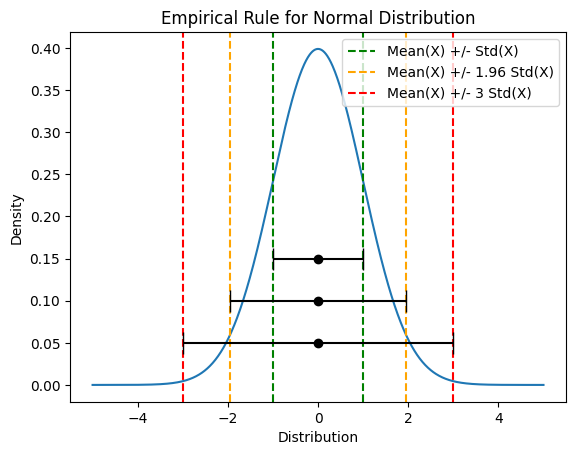

In [3]:
X = np.linspace(-5, 5, 1000)
Y = [ lds.pdf_normal(x, mean, std) for x in X ]

plt.plot(X, Y)
plt.axvline(1, linestyle='--', color='green', label='Mean(X) +/- Std(X)')
plt.axvline(-1, linestyle='--', color='green')
plt.axvline(1.96, linestyle='--', color='orange', label='Mean(X) +/- 1.96 Std(X)')
plt.axvline(-1.96, linestyle='--', color='orange')
plt.axvline(3, linestyle='--', color='red', label='Mean(X) +/- 3 Std(X)')
plt.axvline(-3, linestyle='--', color='red')

plt.errorbar(
    x = [0],
    y = [0.15],
    xerr = [1],
    fmt = 'o',
    capsize = 8,
    color = 'black',
)

plt.errorbar(
    x = [0],
    y = [0.10],
    xerr = [1.96],
    fmt = 'o',
    capsize = 8,
    color = 'black',
)

plt.errorbar(
    x = [0],
    y = [0.05],
    xerr = [3],
    fmt = 'o',
    capsize = 8,
    color = 'black',
)

plt.xlabel('Distribution')
plt.ylabel('Density')

plt.legend()
plt.title('Empirical Rule for Normal Distribution')
plt.show()


### Checking the Empirical Rule

In order to confirm the empirical rule, I conducted an experiment. It involved randomly selecting different values for the mean within $[-50, 50]$ and standard deviation within $[0, 10]$ and then verifying whether the empirical rule actually holds true.

In [4]:
num_trials = 100

In [5]:
confidence_68 = []
confidence_95 = []
confidence_99_7 = []

mean = 0
std = 1

def prob(x):
    global mean, std
    return lds.pdf_normal(x, mean, std)

for trial in range(num_trials):
    mean = random.choice(np.random.uniform(-50, 50, size = 10000))
    std = random.choice(np.random.uniform(0, 10, size = 10000))

    test_68 = lds.integral(prob, mean - std, mean + std)
    test_95 = lds.integral(prob, mean - 1.96 * std, mean + 1.96 * std)
    test_99_7 = lds.integral(prob, mean - 3 * std, mean + 3 * std)

    confidence_68.append(test_68)
    confidence_95.append(test_95)
    confidence_99_7.append(test_99_7)

print('Average area within +/- 1 std:', lds.mean(confidence_68))
print('Average area within +/- 1.96 std:', lds.mean(confidence_95))
print('Average area within +/- 3 std:', lds.mean(confidence_99_7))

Average area within +/- 1 std: 0.6826962006025893
Average area within +/- 1.96 std: 0.9500057206005291
Average area within +/- 3 std: 0.9973003405725107


The result is unanimous. The Empirical Rule has been confirmed.